## 2. multi-layer perception and (ANN)

it will be used when you have non-linear dataset

In [2]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate 1000 rows of synthetic data based on observed patterns
num_rows = 1000

data_large = {
    "CreditScore": np.random.randint(300, 900, num_rows),
    "Age": np.random.randint(18, 70, num_rows),
    "Tenure": np.random.randint(0, 11, num_rows),
    "Balance": np.random.uniform(0, 250000, num_rows),
    "NumOfProducts": np.random.randint(1, 5, num_rows),
    "HasCrCard": np.random.randint(0, 2, num_rows),
    "IsActiveMember": np.random.randint(0, 2, num_rows),
    "EstimatedSalary": np.random.uniform(10000, 200000, num_rows),
    "Exited": np.random.randint(0, 2, num_rows)
}

# Creating DataFrame
dataset = pd.DataFrame(data_large)
# dataset.isnull().sum()
dataset.head(3)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,402,50,9,65828.945938,2,1,0,100953.923013,0
1,735,45,7,11530.891084,1,1,1,173794.467090,1
2,570,64,1,141792.694980,2,1,1,30027.004332,0


In [3]:
in_p=dataset.iloc[:,:-1]
in_o=dataset.iloc[:,-1]
# in_o

In [4]:
in_p.shape

(1000, 8)

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(in_p,in_o,test_size=0.2,random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
d=ss.fit_transform(in_p)

In [7]:
in_p=pd.DataFrame(d,columns=in_p.columns)

In [8]:
import tensorflow

artificial nural network bnane me help kregi

In [59]:
from keras.layers import Dense,BatchNormalization,Dropout
from keras.models import Sequential
from keras.regularizers import l2

now make the network

kernel_regularizer is used for overfitting control

In [70]:
ann=Sequential()
ann.add(Dense(7,input_dim=8,activation="relu",kernel_regularizer=l2(0.01)))
# ann.add(BatchNormalization())
ann.add(Dense(6,activation="relu"))# Second hidden layer
# ann.add(BatchNormalization())
ann.add(Dense(4,activation="relu"))
# ann.add(BatchNormalization())
ann.add(Dropout(0.20))
ann.add(Dense(1,activation="sigmoid")) # Output layer (Binary Classification)

c:\Users\sachi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

here you are training you model 

using validation data you can improve you model overfitting

In [72]:
from keras.callbacks import EarlyStopping

In [ ]:
history=ann.fit(x_train, y_train,batch_size=200,epochs=20,validation_data=(x_test, y_test),callbacks=EarlyStopping())

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.5183 - loss: 19824.0645 - val_accuracy: 0.5250 - val_loss: 18130.5586
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4933 - loss: 17924.2891 - val_accuracy: 0.5250 - val_loss: 17155.4863
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4858 - loss: 18321.0410 - val_accuracy: 0.5250 - val_loss: 16215.1338
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4930 - loss: 16466.3242 - val_accuracy: 0.5250 - val_loss: 15307.2646
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5022 - loss: 14443.7432 - val_accuracy: 0.5250 - val_loss: 14437.8926
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5097 - loss: 14788.1357 - val_accuracy: 0.5250 - val_loss: 13598.7158
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4917 - loss: 15050.0400 - val_accuracy: 0.5250 - val_loss: 12780.8623
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5218 

overfitting ko pahacaanana

In [74]:
acc_train=ann.history.history['accuracy']
acc_test=ann.history.history['val_accuracy']
len(acc_test)

20

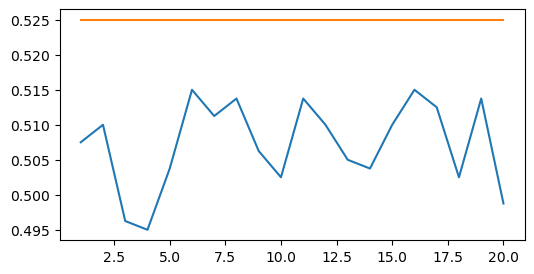

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=[6,3])
plt.plot([i for i in range(1,21)],acc_train)
plt.plot([i for i in range(1,21)],acc_test)


In [76]:
prd=ann.predict(x_test)
# prd=ann.predict(x_train)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [77]:
# prd=ann.predict([[1.288754,-1.058076,1.016193,1.343069,1.301796,0.974329,-0.962695,-0.113442]])
prd_data=[]
for i in prd:
    if i[0]>0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

# prd_data
    

here wee can not see accuracy directly

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prd_data)*100
# accuracy_score(y_train,prd_data)*100


52.5

In [ ]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
521,1.288754,-1.058076,1.016193,1.343069,1.301796,0.974329,-0.962695,-0.113442
737,-1.016928,0.434178,-0.300119,-1.595774,-1.386014,0.974329,1.038750,-0.283456
740,1.068059,1.519453,-1.616432,0.539136,-1.386014,-1.026347,-0.962695,0.761382
660,-0.598769,-0.311949,-0.300119,0.437817,-0.490077,-1.026347,-0.962695,-1.246113
411,-1.138891,-1.600713,-0.958276,-0.891381,-1.386014,-1.026347,1.038750,0.855367
...,...,...,...,...,...,...,...,...
408,-0.192225,0.366348,0.358037,1.162645,0.405859,0.974329,-0.962695,-1.390363
332,-0.128340,0.162859,0.358037,-1.755240,-0.490077,0.974329,-0.962695,0.026008
208,-0.134148,1.383794,-0.629197,1.686961,1.301796,0.974329,-0.962695,0.673138
613,1.538488,-1.261565,-0.629197,1.547671,1.301796,-1.026347,-0.962695,-0.372563


In [ ]:
# ann.predict([[1.288754,	-1.058076	,1.016193	,1.343069	,1.301796	,0.974329	,-0.962695	,-0.113442]])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])